In [1]:
# importing packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data into environment

car_theft = pd.read_csv('/Users/aimemukenajr/Downloads/2015StateAutoThefts.csv')

In [3]:
# display first 10 columns of data

car_theft.head(n=10)

,State,Rank,Make/Model,Model Year,Thefts
0,Alabama,1.0,Chevrolet Pickup (Full Size),2005.0,499
1,Alabama,2.0,Ford Pickup (Full Size),2006.0,357
2,Alabama,3.0,Toyota Camry,2014.0,205
3,Alabama,4.0,Nissan Altima,2014.0,191
4,Alabama,4.0,Chevrolet Impala,2004.0,191
5,Alabama,5.0,Honda Accord,1998.0,180
6,Alabama,6.0,GMC Pickup (Full Size),1999.0,152
7,Alabama,7.0,Dodge Pickup (Full Size),1998.0,138
8,Alabama,8.0,Ford Mustang,2002.0,122
9,Alabama,9.0,Ford Explorer,2002.0,119


In [6]:
# let's look at data types

print("Data Type of Each Column: ")
car_theft.dtypes

Data Type of Each Column: 


State          object
Rank          float64
Make/Model     object
Model Year    float64
Thefts         object
dtype: object

In [43]:
# 'Thefts' has the wrong data type, let's convert it into float

car_theft['Thefts']=car_theft['Thefts'].str.replace('[^\d.]', '').astype(float)

In [44]:
# check if the code was successful
car_theft.dtypes

State          object
Rank          float64
Make/Model     object
Model Year    float64
Thefts        float64
dtype: object

In [45]:
# use groupby to get the number of stolen cars per state

per_state= car_theft.groupby("State")["Thefts"].sum()

print(per_state)

#car_theft['Thefts']

State
Alabama                  2154.0
Alaska                    547.0
Arizona                  5270.0
Arkansas                 1464.0
California              86768.0
Colorado                 5290.0
Connecticut              1980.0
Delaware                  300.0
District Of Columbia      805.0
Florida                  9664.0
Georgia                  6497.0
Hawaii                    957.0
Idaho                     458.0
Illinois                 5015.0
Indiana                  3131.0
Iowa                     1023.0
Kansas                   2030.0
Kentucky                 1370.0
Louisiana                2794.0
Maine                     148.0
Maryland                 3338.0
Massachusetts            2158.0
Michigan                 4946.0
Minnesota                2697.0
Mississippi              1320.0
Missouri                 4199.0
Montana                   622.0
Nebraska                 1079.0
Nevada                   3883.0
New Hampshire             162.0
New Jersey               3847.0
Ne

In [46]:
# perform a statistical summary of vehicle theft for each state

stats_state= car_theft.groupby("State")["Thefts"].describe()

print(stats_state)

                      count    mean           std     min      25%     50%  \
State                                                                        
Alabama                10.0   215.4    120.673296   119.0   141.50   185.5   
Alaska                 10.0    54.7     39.291079    20.0    28.75    45.0   
Arizona                10.0   527.0    359.883314   200.0   219.00   348.5   
Arkansas               10.0   146.4    106.612695    68.0    77.50   105.5   
California             10.0  8676.8  10369.813765  2033.0  2751.00  4388.5   
Colorado               10.0   529.0    425.793638   170.0   209.75   379.0   
Connecticut            10.0   198.0    179.501780    76.0    93.75   120.5   
Delaware               10.0    30.0     10.964589    20.0    22.25    25.5   
District Of Columbia   10.0    80.5     44.023352    40.0    43.00    66.0   
Florida                10.0   966.4    461.813142   479.0   603.00   969.5   
Georgia                10.0   649.7    241.841569   425.0   460.

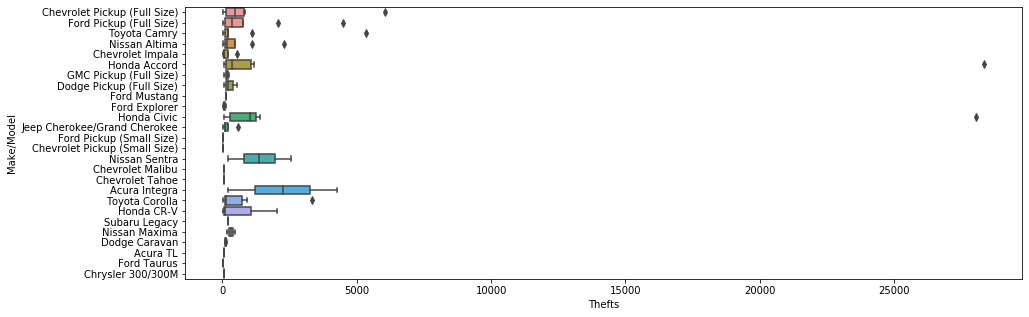

In [71]:
# let's look at a boxplot of car thefts by Make/Model

# first let's subset the dataframe to only look at the first 100 rows
sub= car_theft[0:100]

plt.figure(figsize=(15,5))
sns.boxplot(x= "Thefts", y="Make/Model", data= sub)

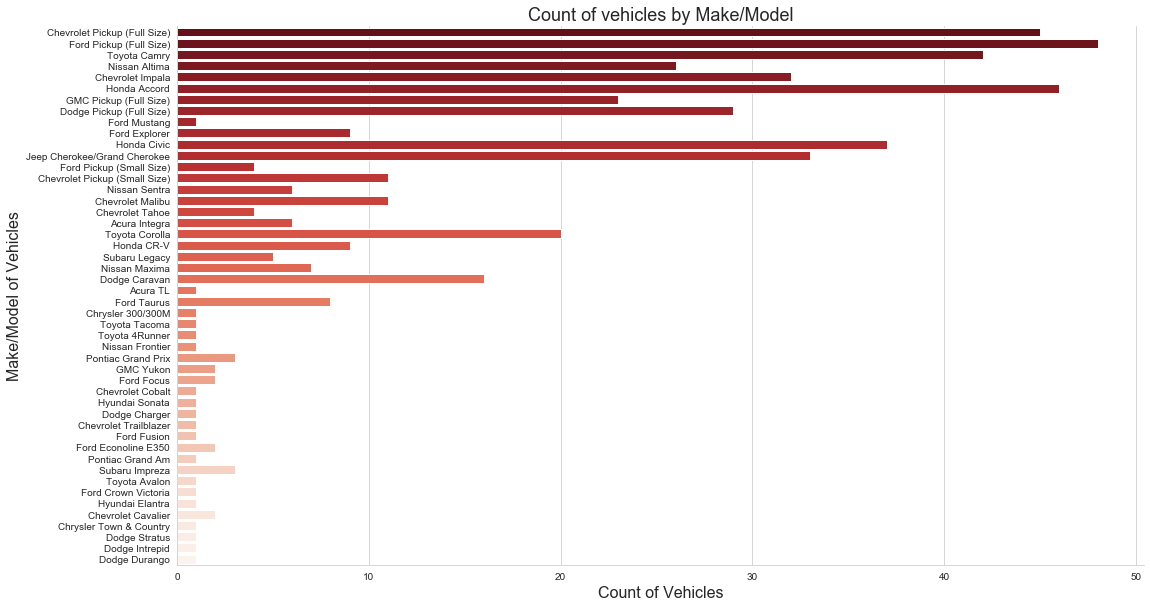

In [80]:
# looking at the count of vehicles by Make/Model

sns.set_style("whitegrid")
g = sns.factorplot(y="Make/Model", data=car_theft, kind="count",
                   palette="Reds_r", size=8, aspect=2)
g.ax.set_title("Count of vehicles by Make/Model",fontdict={'size':18})
g.ax.xaxis.set_label_text("Count of Vehicles",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Make/Model of Vehicles",fontdict= {'size':16})
plt.show()

<Figure size 1440x360 with 0 Axes>

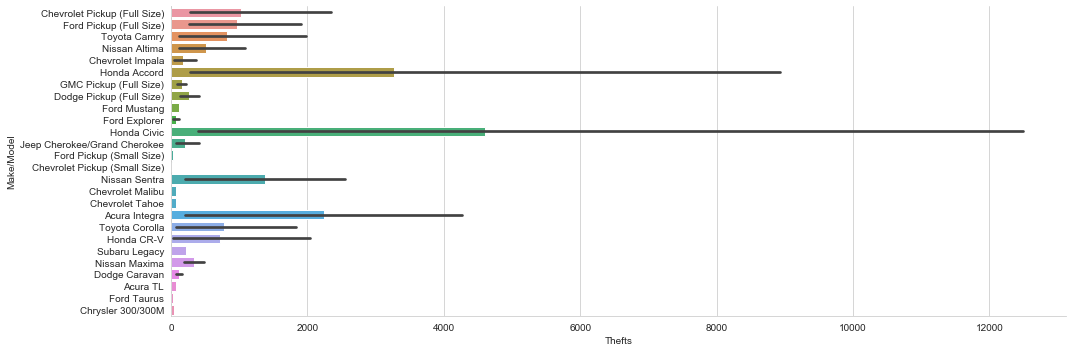

In [82]:
# bar plot showing number of thefts by make/model
# Honda Civic seems to be the model favored by car hijackers

plt.figure(figsize=(20,5))
sns.catplot(x= "Thefts", y="Make/Model", data= sub, kind= 'bar', height= 5, aspect= 3)

<Figure size 1440x360 with 0 Axes>

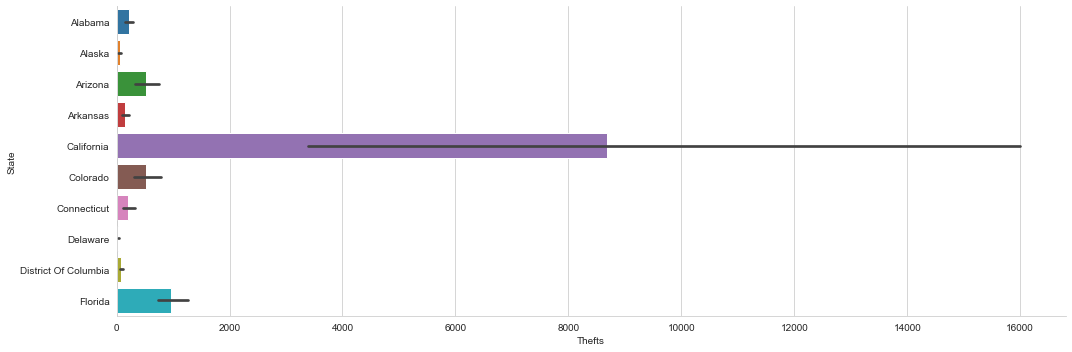

In [83]:
# similar plot as the one above, this time looking at number of thefts by states
# California is the leading state in car theft

plt.figure(figsize=(20,5))
sns.catplot(x= "Thefts", y="State", data= sub, kind= 'bar', height= 5, aspect= 3)